In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

In [94]:
df = pd.read_csv('movie_metadata.csv')

<Axes: xlabel='director_facebook_likes', ylabel='Density'>

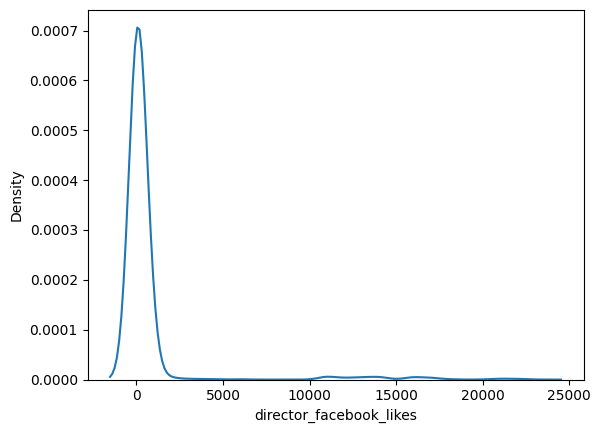

In [95]:
sns.kdeplot(df['director_facebook_likes'])

<Axes: xlabel='actor_1_facebook_likes', ylabel='Density'>

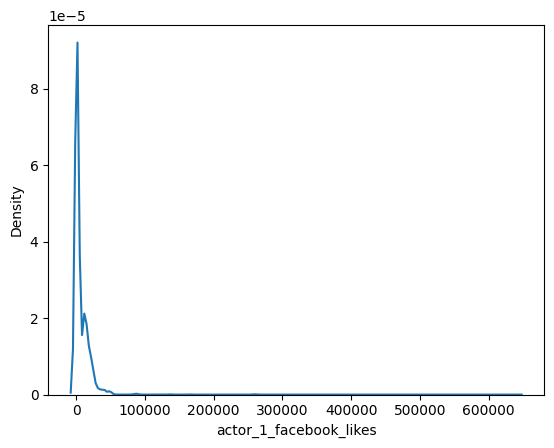

In [96]:
sns.kdeplot(df['actor_1_facebook_likes'])

In [97]:
features = df[['director_facebook_likes', 'actor_1_facebook_likes',
               'actor_2_facebook_likes','actor_3_facebook_likes', 'movie_facebook_likes',
               'cast_total_facebook_likes']]

features = features.dropna()  # Drop rows with missing values


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [98]:
pca = PCA(n_components=2)  # Reduce dimensions to 3D for better visualization
pca_components = pca.fit_transform(scaled_features)

<Axes: ylabel='Density'>

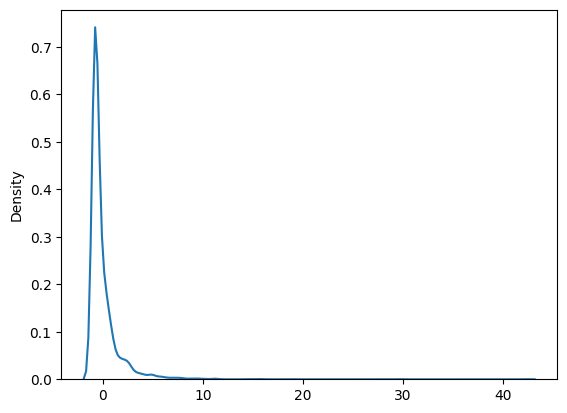

In [99]:
sns.kdeplot(pca_components[:, 0])

<Axes: ylabel='Density'>

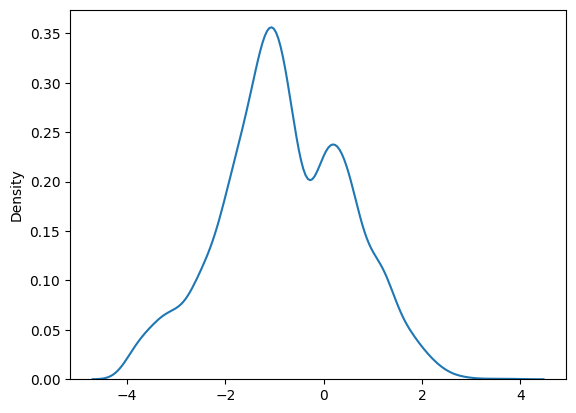

In [100]:
trans1 = FunctionTransformer(np.log1p)
pca_components[:, 0] = trans1.fit_transform(pca_components[:, 0])
sns.kdeplot(pca_components[:, 0])

<Axes: ylabel='Density'>

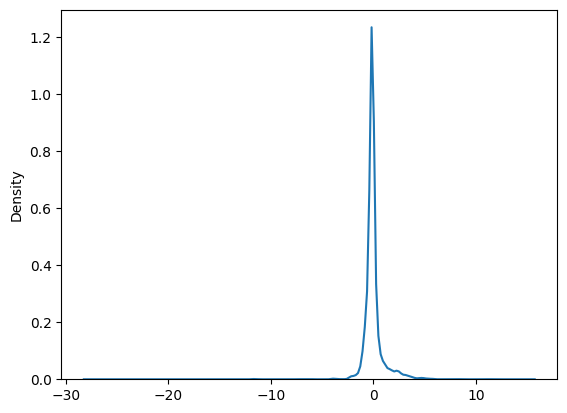

In [101]:
sns.kdeplot(pca_components[:, 1])

<Axes: ylabel='Density'>

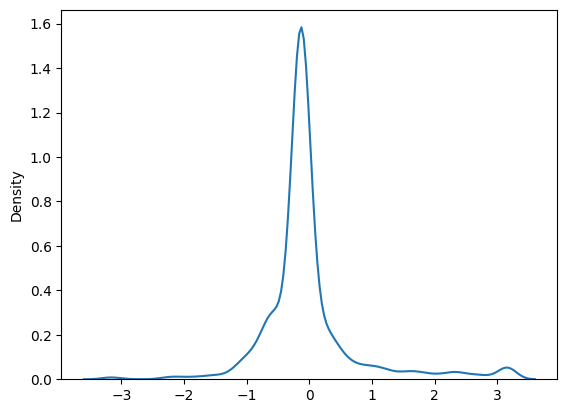

In [102]:
upper_lim = pca_components[:, 1].mean() + 3 * pca_components[:, 1].std()
lower_lim = pca_components[:, 1].mean() - 3 * pca_components[:, 1].std()

pca_components[:, 1] = np.where(pca_components[:, 1] < lower_lim, lower_lim,
                                np.where(pca_components[:, 1] > upper_lim, upper_lim, pca_components[:, 1]))
sns.kdeplot(pca_components[:, 1])

In [103]:
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

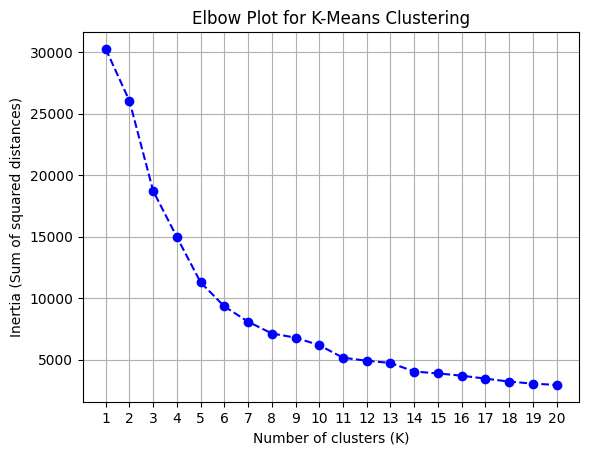

In [104]:
# Plot the elbow plot to find the optimal number of clusters
plt.plot(range(1, 21), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

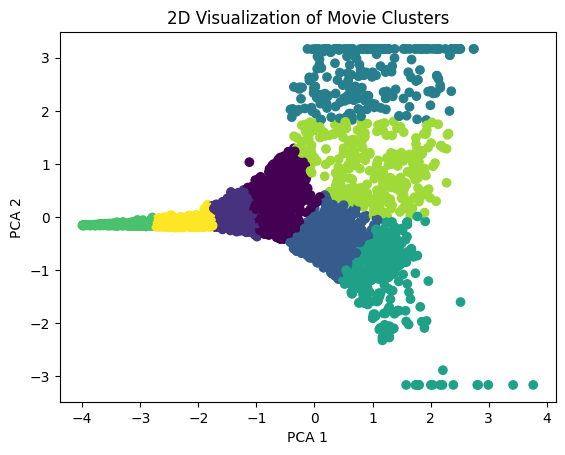

In [106]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(pca_components)

df['cluster'] = kmeans.labels_


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D Visualization of Movie Clusters')

plt.show()

In [110]:
df.to_excel('clustered_movies.xlsx', index=False)

#1 Selected 6 key features (social media likes related) out of around 20 features ['director_facebook_likes', 'actor_1,2,3_facebook_likes','total cast facebook likes', and 'movie_facebook_likes'] to be used for clustering
#2 Performed data cleaning such as dropping the null values and scaling using standard scaler
#3 Applied PCA to extract 2 principal components out of thwe 5 features
#4 The first PC had right skewed distribution, hence applied FunctionTransformer with log transform. The 2nd PC had outliers on both sides, hence imposed data capping of (mean - 3std, mean + 3std) using np.where
#5 Fitted the data into KMeans model and identified the optimal number of clusters (8) (wihout PCA 15 clusters) by plotting Elbow graph
#6 Visualized the clusters through scatter plots